# Проект: Восстановление золота из руды

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Открытие-данных" data-toc-modified-id="Открытие-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открытие данных</a></span></li><li><span><a href="#Проверка-рассчёта-эффективности-обогащения" data-toc-modified-id="Проверка-рассчёта-эффективности-обогащения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка рассчёта эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов" data-toc-modified-id="Концентрация-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ</a></span></li></ul></li><li><span><a href="#Обучение-и-тест-моделей" data-toc-modified-id="Обучение-и-тест-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и тест моделей</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-разных-моделей-и-оценка-их-качества" data-toc-modified-id="Обучение-разных-моделей-и-оценка-их-качества-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и оценка их качества</a></span></li><li><span><a href="#Тест-лучших-моделей" data-toc-modified-id="Тест-лучших-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тест лучших моделей</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Описание проекта**

Компания «Цифра» (название вымышленное) разрабатывает решения для эффективной работы промышленных предприятий.

Требуется подготовить прототип модели машинного обучения.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Она поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. Нужно использовать данные с параметрами добычи и очистки.

Что необходимо сделать:
1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Файлы с данными:

- `gold_recovery_train_new.csv` — обучающая выборка;
- `gold_recovery_test_new.csv` — тестовая выборка;
- `gold_recovery_full_new.csv` — исходные данные.

## Подготовка данных

### Импорт библиотек

Произведём необходимые импорты:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

### Открытие данных

Загрузим датасеты:

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

Создадим функцию для просмотра основной информации:

In [3]:
def df_info(df):
    
    '''This funcion shows base informatoin about your DataFrame'''
    
    print('DataFrame:')
    display(df.head())
    print('------------------------------------------------------------------------------------------')
    print('Info:')
    print('')
    print(df.info())
    print('------------------------------------------------------------------------------------------')
    print('Shape')
    print('')
    display(df.shape)

Посмотрим на датасеты:

In [4]:
df_info(df_train)

DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.su

(16860, 87)

In [5]:
df_info(df_test)

DataFrame:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        58

(5856, 53)

In [6]:
df_info(df_full)

DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.su

(22716, 87)

In [7]:
len(df_train) + len(df_test)

22716

На первый взглят видно:
- обучающая выборка и тестовые похоже действительно взяты из общего датасета;
- в тестовой выборке используются не все колонки, 53 против 87 в обучающей. Очевидно это связанно с тем, что в тестовой выборке отделены целевые признаки, а в обучающей нет;
- вероятно обучающая выборка отделялась от тестовой по временному признаку, т.к. колонка с датой в обучающей выборке имеет круглое значение времени, в то время как в тестовой выборке все значения времени оканчиваются на последнюю минуту часа.

### Проверка рассчёта эффективности обогащения

Создадим формулу расчёта эффективности обогащения:

C - доля золота в концентрате после флотации, колонка "rougher.output.concentrate_au"\
F - доля золота в сырье/концентрате до флотации, колонка "rougher.input.feed_au"\
T - доля золота в отвальных хвостах после флотации, колонка "rougher.output.tail_au"

recovery = ((C * (F - T)) / (F * (C - T))) * 100%

Создадим функцию для расчёта этой формулы:

In [8]:
def calc_recovery(c, f, t):
    recovery = ((c * (f - t)) / (f * (c - t))) * 100
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    return recovery

Теперь воспользуемся функцией и создадим колонку с расчётами:

In [9]:
df_train['rougher.output.calc'] = calc_recovery(df_train['rougher.output.concentrate_au'],
           df_train['rougher.input.feed_au'], df_train['rougher.output.tail_au'])

Посмотрим что получилось и сравним с колонкой "rougher.output.recovery":

In [10]:
df_train[['rougher.output.recovery', 'rougher.output.calc']].head()

,rougher.output.recovery,rougher.output.calc
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


Теперь для корректного расчёта МАЕ, переведём все пропуски в нулевые значения:

In [11]:
df_train['rougher.output.recovery'].fillna(0, inplace=True)
df_train['rougher.output.calc'].fillna(0, inplace=True)

Посчитаем МАЕ:

In [12]:
mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.calc'])

8.00350954615662e-15

Значение МАЕ получилось очень низким. Это значит что эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке

Проанализируем признаки, недоступные в тестовой выборке.\
Для этого возьмём колонки, которых нет в тестовой выборке:

In [13]:
test_columns = df_test.columns
df_non_test_columns = df_full.drop(test_columns, axis=1)

In [14]:
df_info(df_non_test_columns)

DataFrame:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.output.concentrate_ag                 22618 non-null float64
primary_cleaner.output.

(22716, 34)

По всей видимости, здесь мы имеем дело с выходными значениями сырья и прочих химикатов которые получаются на разных этапах обогащения сырья.

### Предобработка данных

Для начала дропнем колонки с датой, так как они нам не нужны:

In [15]:
df_full = df_full.drop('date', axis=1)
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

In [16]:
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Теперь посмотрим на пропуски:

In [17]:
df_full.isna().sum()

final.output.concentrate_ag                     89
final.output.concentrate_pb                     87
final.output.concentrate_sol                   385
final.output.concentrate_au                     86
final.output.recovery                         1963
                                              ... 
secondary_cleaner.state.floatbank5_a_level     101
secondary_cleaner.state.floatbank5_b_air       101
secondary_cleaner.state.floatbank5_b_level     100
secondary_cleaner.state.floatbank6_a_air       119
secondary_cleaner.state.floatbank6_a_level     101
Length: 86, dtype: int64

Видно, что во всех колонках имеются пропуски. Вероятно, что пропуски могут быть из-за разных этапов обогащения.

Сначала возьмём обучающую выборку и оставим в ней только те колонки которые учавствуют в тестовой выборке:

In [18]:
df_train = df_train[df_test.columns]
df_train.shape

(16860, 52)

Теперь посмотрим на пропуски в обучающей и тестовой выборках:

In [19]:
df_train.isna().sum()

primary_cleaner.input.sulfate                 1307
primary_cleaner.input.depressant              1262
primary_cleaner.input.feed_size                  0
primary_cleaner.input.xanthate                 985
primary_cleaner.state.floatbank8_a_air          40
primary_cleaner.state.floatbank8_a_level        33
primary_cleaner.state.floatbank8_b_air          40
primary_cleaner.state.floatbank8_b_level        27
primary_cleaner.state.floatbank8_c_air          38
primary_cleaner.state.floatbank8_c_level        27
primary_cleaner.state.floatbank8_d_air          39
primary_cleaner.state.floatbank8_d_level        27
rougher.input.feed_ag                           82
rougher.input.feed_pb                          228
rougher.input.feed_rate                        513
rougher.input.feed_size                        417
rougher.input.feed_sol                         292
rougher.input.feed_au                           83
rougher.input.floatbank10_sulfate             1044
rougher.input.floatbank10_xanth

In [20]:
df_test.isna().sum()

primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257
rougher.input.floatbank10_xanthate            123


В обеих выборках есть пропуски. С ними обучать и проверять модели не получится. Надо что-то с ними делать.
Переведём все пропущенные значения в средние. Забегая вперёд, пробовал ещё методы удалять пропуски и заменять на нулевые значения. Вариант с заменой на средние показал наилучшие резутаты.

In [21]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [22]:
df_train.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [23]:
df_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [24]:
print(df_train.shape, df_test.shape, sep=' | ')

(16860, 52) | (5856, 52)


Теперь у нас есть выборки без пропусков на основе которых можно пробовать строить модель.

## Анализ данных

### Концентрация металлов

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Создадим функцию для визуализации. Сразу отсеим около нулевые значения, чтобы не смотреть на выбросы:

In [25]:
def show_concentrate(rougher, prim_clean, final, title):
    rougher_concentration = df_full[df_full[rougher] > 1]
    prim_clean_concentration = df_full[df_full[prim_clean] > 1]
    final_concentration = df_full[df_full[final] > 1]
    
    plt.figure(figsize=(10, 6))
    sns.distplot(rougher_concentration[[rougher]], bins=30)
    sns.distplot(prim_clean_concentration[[prim_clean]], bins=30)
    sns.distplot(final_concentration[[final]], bins=30)
    plt.legend(['rougher', 'primary clean', 'final'])
    plt.title(title)
    plt.show()

Сперва посмотрим на концентрацию золота:

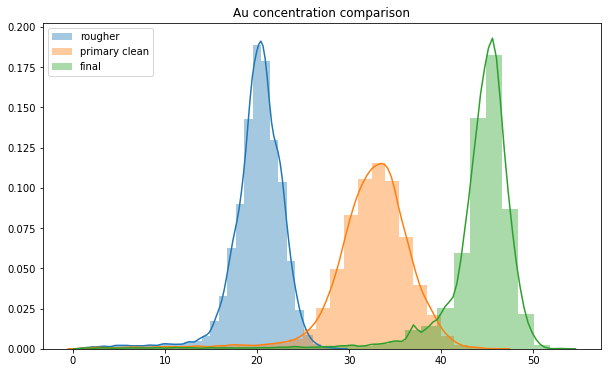

In [26]:
show_concentrate(
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au',
    'Au concentration comparison'
)

Видно, что на первом этапе очистки концентрация выше, но более широко распределена. На финальном этапе распределение менее широкое, но в этом распределении концентрация высокая.

Теперь посмотрим на концентрацию серебра:

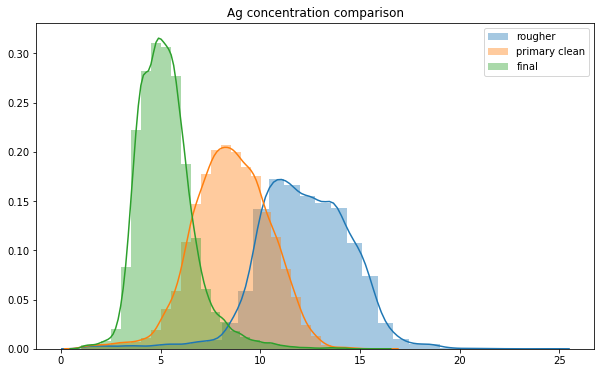

In [27]:
show_concentrate(
    'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag',
    'Ag concentration comparison'
)

Тут мы видим, что на каждом этапе распределение становится меньше, а конценрация снижается.

И наконец посмотрим на концентрацию свинца:

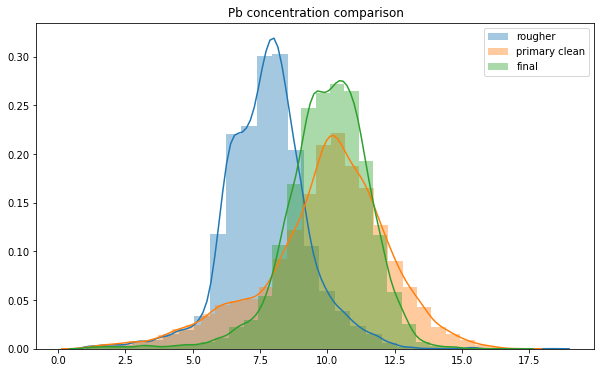

In [28]:
show_concentrate(
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb',
    'Pb concentration comparison'
)

Здесь мы видим, что концентрация свинца с каждым этапом почти не меняется, немного возрастает но незначительно.

В целом можно сказать, что к концу обогащения концентрация золота значительно возрастает, концентрация серебра снижается, а концетрация свинца остаётся примерно тем-же. 

###  Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Теперь изучим размеры гранул сырья в обучающей и тестовой выборках. Сразу отбросим около нулевые значения:

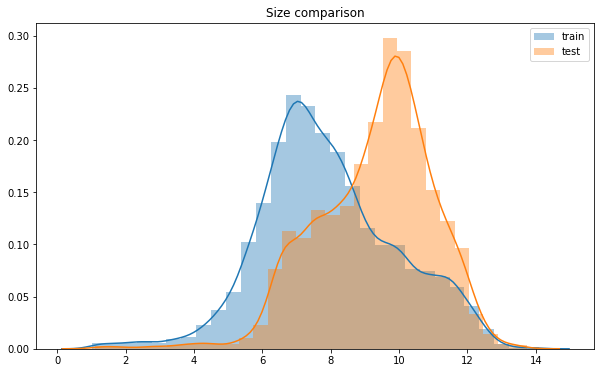

In [29]:
rougher_train_concentration = df_train[df_train['rougher.input.feed_au'] > 1]
rougher_test_concentration = df_test[df_test['rougher.input.feed_au'] > 1]
    
plt.figure(figsize=(10, 6))
sns.distplot(rougher_train_concentration[['rougher.input.feed_au']], bins=30)
sns.distplot(rougher_test_concentration[['rougher.input.feed_au']], bins=30)
plt.legend(['train', 'test'])
plt.title('Size comparison')
plt.show()

В целом, распределения немного отличаются, но не критично. Видно, что в тестовой выборке преобладают более крупные гранулы.

### Исследование суммарной концентрации всех веществ

Теперь займёмся исследованием суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Сложим все металлы на разных стадиях и посмотрим на результаты:

In [30]:
def sum_concentrate(au, ag, pb, sol):
    return df_full[au] + df_full[ag] + df_full[pb] + df_full[sol]

In [31]:
rough_sum = sum_concentrate(
    'rougher.input.feed_au', 'rougher.input.feed_ag',
    'rougher.input.feed_pb', 'rougher.input.feed_sol'
)
rougher_output_sum = sum_concentrate(
    'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol'
)
primary_cleaner_output_sum = sum_concentrate(
    'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol'
)
final_output_sum = sum_concentrate(
    'final.output.concentrate_au', 'final.output.concentrate_ag',
    'final.output.concentrate_pb', 'final.output.concentrate_sol'
)

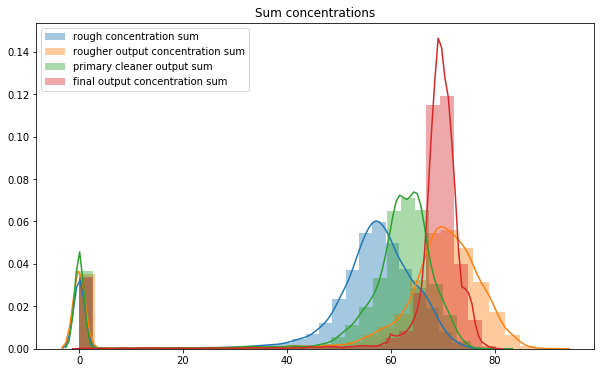

In [32]:
plt.figure(figsize=(10, 6))
sns.distplot(rough_sum, bins=30)
sns.distplot(rougher_output_sum, bins=30)
sns.distplot(primary_cleaner_output_sum, bins=30)
sns.distplot(final_output_sum, bins=30)
plt.legend(['rough concentration sum', 'rougher output concentration sum',
     'primary cleaner output sum', 'final output concentration sum'])
plt.title('Sum concentrations')
plt.show()

Видно, что есть аномалии в виде нулевых значений. Вероятно это связано с тем, что в породе попадаются частицы не содержащие металов. Строки с такими значениями могут навредить обучению и предсказаниям модели, думаю стоит от них избавиться.

Возьмём строки с нулевыми значениями и удалим их из обучающей и тестовой выборок:

In [33]:
def drop_zeros(df):
    df_final = df.drop(rough_sum[rough_sum == 0].index, errors='ignore')
    df_final = df.drop(rougher_output_sum[rougher_output_sum == 0].index, errors='ignore')
    df_final = df.drop(primary_cleaner_output_sum[primary_cleaner_output_sum == 0].index, errors='ignore')
    df_final = df.drop(final_output_sum[final_output_sum == 0].index, errors='ignore')
    return df_final

Сперва из обучающей выборки:

In [34]:
df_train_final = drop_zeros(df_train)

In [35]:
df_train.shape

(16860, 52)

In [36]:
df_train_final.shape

(15531, 52)

Теперь из тестовой выборки:

In [37]:
df_test_final = drop_zeros(df_test)

In [38]:
df_test.shape

(5856, 52)

In [39]:
df_test_final.shape

(5349, 52)

Теперь можно приступать к построению модели.

## Обучение и тест моделей

### Функция для вычисления итоговой sMAPE

Создадим функцию для вычисления итоговой sMAPE.

Формула для вычисления:

Итоговое sMAPE = 25% * sMAPE(rougher) + 75% * sMAPE(final)

In [40]:
def total_smape(smape_rougher, smape_final):
    final_result = 0.25 * smape_rougher + 0.75 * smape_final
    return final_result

### Обучение разных моделей и оценка их качества

Обучим несколько разных моделей на получившейся обучающей выборке, посчитаем получившийся sMAPE и проверим их на тестовой выборке.

Для обучения моделей воспользуемся кросс валидацией.

Ещё нам надо добавить к обучающей и тестовой выборкам целевые признаки. Это колонки "rougher.output.recovery" и "final.output.recovery". Создадим под каждый целевой признак свои обучающие и тестовые выборки, и таргеты:

Сперва создадим выборки под черновой целевой признак:

In [41]:
rougher_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb',
    'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol',
    'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 
    'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']

train_rougher = df_train_final[rougher_columns]
target_train_rougher = df_full['rougher.output.recovery'][train_rougher.index]
test_rougher = df_test_final[rougher_columns]
target_test_rougher = df_full['rougher.output.recovery'][test_rougher.index]

print(train_rougher.shape, target_train_rougher.shape, test_rougher.shape, target_test_rougher.shape, sep=' | ')

(15531, 22) | (15531,) | (5349, 22) | (5349,)


Теперь тоже-самое для финального целевого признака:

In [42]:
train_final = df_train_final.drop(rougher_columns, axis=1)
target_train_final = df_full['final.output.recovery'][train_final.index]
test_final = df_test_final.drop(rougher_columns, axis=1)
target_test_final = df_full['final.output.recovery'][test_final.index]

print(train_final.shape, target_train_final.shape, test_final.shape, target_test_final.shape, sep=' | ')

(15531, 30) | (15531,) | (5349, 30) | (5349,)


Есть небольшая загвоздка, у нас в таргетах имеются немного пропусков:

In [43]:
print(target_train_rougher.isna().sum(), target_test_rougher.isna().sum(),
      target_train_final.isna().sum(), target_test_final.isna().sum(), sep=' | ')

820 | 370 | 321 | 140


Удалим пропуски в таргетах:

In [44]:
train_rougher = train_rougher.drop(target_train_rougher[target_train_rougher.isna() == True].index)
target_train_rougher.dropna(inplace=True)

test_rougher = test_rougher.drop(target_test_rougher[target_test_rougher.isna() == True].index)
target_test_rougher.dropna(inplace=True)

train_final = train_final.drop(target_train_final[target_train_final.isna() == True].index)
target_train_final.dropna(inplace=True)

test_final = test_final.drop(target_test_final[target_test_final.isna() == True].index)
target_test_final.dropna(inplace=True)

print('Пропуски:', target_train_rougher.isna().sum(), target_test_rougher.isna().sum(),
      target_train_final.isna().sum(), target_test_final.isna().sum(), sep=' | ')
print('Размеры выборок черновой обработки:', train_rougher.shape, target_train_rougher.shape,
      test_rougher.shape, target_test_rougher.shape, sep=' | ')
print('Размеры выборок финальной обработки:', train_final.shape, target_train_final.shape,
      test_final.shape, target_test_final.shape, sep=' | ')

Пропуски: | 0 | 0 | 0 | 0
Размеры выборок черновой обработки: | (14711, 22) | (14711,) | (4979, 22) | (4979,)
Размеры выборок финальной обработки: | (15210, 30) | (15210,) | (5209, 30) | (5209,)


Выборки созданы, теперь можно заняться моделями.

Для начала, создадим функцию для оценки, которая будет выдавать результат оценки по необходимой формуле вычисления sMAPE.

Формула расчёта sMAPE: 1 / N * ( |y[ i ] - y'[ i ]| ) / ( |y[ i ]| + |y'[ i ]| ) / 2) * 100%

In [45]:
def smape_scorer(target, predictions):
    smape = ((1 / len(target)) * (abs(target - predictions) / ((abs(target) + abs(predictions)) / 2))).sum() * 100
    return smape

Теперь создадим функцию для обучения, выбора и оценки лучшей модели по вышесозданной функции:

In [46]:
def fit_and_check(model, params, df_train, df_target):
    my_scorer = make_scorer(smape_scorer, greater_is_better=False)
    clf = GridSearchCV(model, params, scoring=my_scorer, cv=5)
    clf.fit(df_train, df_target)
    
    return clf.best_estimator_, clf.best_score_

Возьмём модели: Решающее дерево, Случайный лес и Линейную регрессию.\
Создадим функцию для прогона по выбранным моделям, сохранения лучших моделей, вывода результатов и подчитаем время подбора каждой модели:

In [47]:
def models_score(train, target):
    
    print('Время обучения и подбора лучшей модели Решающее дерево:')
    model_tree = DecisionTreeRegressor()
    params = {'max_depth': range(1, 20), 'random_state': [555]}
    best_tree_model, best_tree_model_result = %time fit_and_check(model_tree, params, train, target)
    print('__________________________________________________________')
    
    print('Время обучения и подбора лучшей модели Случайный лес:')    
    model_forest = RandomForestRegressor()
    params = {'n_estimators': range(50, 100, 10), 'max_depth': range(1, 5), 'random_state': [555]}
    best_forest_model, best_forest_model_result = %time fit_and_check(model_forest, params, train, target)
    print('__________________________________________________________')
    
    print('Время обучения и подбора лучшей модели Линейная регрессия:')    
    model_linear = LinearRegression()
    params = {}
    best_lin_model, best_lin_model_result = %time fit_and_check(model_linear, params, train, target)
    
    results = [best_tree_model_result, best_forest_model_result, best_lin_model_result]
    
    return best_tree_model, best_forest_model, best_lin_model, results

Проведём исследования на обучающих выборках по черновому процессу:

In [48]:
best_tree_model_1, best_forest_model_1, best_lin_model_1, results_train_rougher = models_score(
    train_rougher, target_train_rougher)

Время обучения и подбора лучшей модели Решающее дерево:
CPU times: user 23.9 s, sys: 9.72 ms, total: 23.9 s
Wall time: 24.2 s
__________________________________________________________
Время обучения и подбора лучшей модели Случайный лес:
CPU times: user 5min 30s, sys: 273 ms, total: 5min 31s
Wall time: 5min 33s
__________________________________________________________
Время обучения и подбора лучшей модели Линейная регрессия:
CPU times: user 573 ms, sys: 636 ms, total: 1.21 s
Wall time: 1.2 s


Теперь проделаем все те-же действия с моделями только на выборках финальной очистки:

In [49]:
best_tree_model_2, best_forest_model_2, best_lin_model_2, results_train_final = models_score(
    train_final, target_train_final)

Время обучения и подбора лучшей модели Решающее дерево:
CPU times: user 45.8 s, sys: 83.7 ms, total: 45.9 s
Wall time: 46.1 s
__________________________________________________________
Время обучения и подбора лучшей модели Случайный лес:
CPU times: user 7min 43s, sys: 352 ms, total: 7min 43s
Wall time: 7min 46s
__________________________________________________________
Время обучения и подбора лучшей модели Линейная регрессия:
CPU times: user 921 ms, sys: 813 ms, total: 1.73 s
Wall time: 1.7 s


Воспользуемся функцией по вычислению итоговой sMAPE и посмотрим на результаты:

In [50]:
res_train = {'sMAPE rougher output': results_train_rougher,
       'sMAPE final output': results_train_final,
       'sMAPE total': [total_smape(results_train_rougher[0], results_train_final[0]),
                      total_smape(results_train_rougher[1], results_train_final[1]),
                      total_smape(results_train_rougher[2], results_train_final[2])]}
train_results = pd.DataFrame(data=res_train, index=('Model Tree', 'Model Forest', 'Model Linear Regression'))
train_results

,sMAPE rougher output,sMAPE final output,sMAPE total
Model Tree,-11.789336,-10.498410,-10.821141
Model Forest,-11.811691,-10.363714,-10.725708
Model Linear Regression,-13.171741,-11.422945,-11.860144


В результатах видно, что все модели ушли в отрицательные значения. Это связанно с тем, что наша метрика не ограничивается нулевым значением и чем ниже показатель, тем лучше.

В результате лучше всех справилась модель Линейная регрессия. Она быстрее всех обучилась и показала самый лучший итоговый результат. А хуже всех - модель Случайный лес. Она дольше всех обучалась и итоговый результат уступает.

### Тест лучших моделей

Теперь проверим лучшие модели на тестовых выборках.

Создадим функцию по тестированию и выводу результатов. Заодно внедрим сюда дамми-модель, что-бы понять насколько результаты оправдывают наши ожидания:

In [51]:
def final_test(model_tree, model_forest, model_linear, df_test, df_target, df_test_dummy, df_target_dummy):
    
    print('Время предсказания решающего дерева:') 
    predictions_tree = %time model_tree.predict(df_test)
    score_tree = smape_scorer(df_target, predictions_tree)
    print('--------------------------------------------')
    
    print('Время предсказания случайного леса:')
    predictions_forest = %time model_forest.predict(df_test)
    score_forest = smape_scorer(df_target, predictions_forest)
    print('--------------------------------------------')
    
    print('Время предсказания линейной регрессии:')
    predictions_linear = %time model_linear.predict(df_test)
    score_linear = smape_scorer(df_target, predictions_linear)
    
    dummy = DummyRegressor(strategy='median').fit(df_test_dummy, df_target_dummy)
    predictions_dummy = dummy.predict(df_test)
    score_dummy = smape_scorer(df_target, predictions_dummy)
    
    results = [score_tree, score_forest, score_linear, score_dummy]
    
    return results

Проведём исследования:

In [52]:
results_test_rougher = final_test(best_tree_model_1, best_forest_model_1, best_lin_model_1,
                          test_rougher, target_test_rougher, train_rougher, target_train_rougher)

Время предсказания решающего дерева:
CPU times: user 2.57 ms, sys: 0 ns, total: 2.57 ms
Wall time: 1.99 ms
--------------------------------------------
Время предсказания случайного леса:
CPU times: user 9.99 ms, sys: 0 ns, total: 9.99 ms
Wall time: 9.75 ms
--------------------------------------------
Время предсказания линейной регрессии:
CPU times: user 1.99 ms, sys: 5 µs, total: 2 ms
Wall time: 1.22 ms


In [53]:
results_test_final = final_test(best_tree_model_2, best_forest_model_2, best_lin_model_2,
                          test_final, target_test_final, train_final, target_train_final)

Время предсказания решающего дерева:
CPU times: user 2.65 ms, sys: 11.8 ms, total: 14.4 ms
Wall time: 2.44 ms
--------------------------------------------
Время предсказания случайного леса:
CPU times: user 17.3 ms, sys: 3.99 ms, total: 21.3 ms
Wall time: 20.7 ms
--------------------------------------------
Время предсказания линейной регрессии:
CPU times: user 2.36 ms, sys: 7 µs, total: 2.37 ms
Wall time: 1.19 ms


Посмотрим на результаты:

In [54]:
res_test = {'test sMAPE rougher output': results_test_rougher,
       'test sMAPE final output': results_test_final,
       'test sMAPE total': [total_smape(results_test_rougher[0], results_test_final[0]),
                      total_smape(results_test_rougher[1], results_test_final[1]),
                      total_smape(results_test_rougher[2], results_test_final[2]),
                        total_smape(results_test_rougher[3], results_test_final[3])]}
train_results = pd.DataFrame(data=res_test, index=(
    'Model Tree', 'Model Forest', 'Model Linear Regression', 'Dummy results'))
train_results

,test sMAPE rougher output,test sMAPE final output,test sMAPE total
Model Tree,13.301576,10.609996,11.282891
Model Forest,13.179359,10.465777,11.144172
Model Linear Regression,13.228405,10.597319,11.255091
Dummy results,13.202793,10.462227,11.147368


Итоговый результаты на тесте у всех моделей очень близки. Несмотря на худший результат на валидации, лидером оказалась модель Случайный лес. Проверку на адекватность модели тоже прошли успешно. Все модели практически не уступают Дамми модели в результатах. Это нормально, так как она обучалась на тестовых данных.

## Общий вывод

Наиболее подходящими для решения поставленной задачи можно считать модели Линейная регрессия и Случайнай лес. Они показали хорошие результаты. Линейная модель лучше подойдёт, если больше важна скорость при решении задачи, а модель Случайнай лес - если важнее качество.